In [45]:
from itertools import product
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv("data/melb_data.csv")
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<AxesSubplot:>

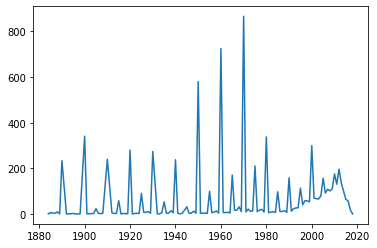

In [4]:
minyr = 1880
year = data["YearBuilt"].value_counts().sort_index()
year = year[year.index > minyr]
year.plot()

Periodic spikes on the first year of each decade, *e.g.*, 1951, 1961, 1971. Smaller frequency every 5 years.

In [5]:
diff = year - year.shift(1)
diff.sort_values().head(20)

1971.0   -856.0
1961.0   -718.0
1951.0   -576.0
1901.0   -340.0
1981.0   -332.0
1921.0   -279.0
1932.0   -273.0
1941.0   -234.0
1912.0   -234.0
1892.0   -233.0
2001.0   -230.0
1976.0   -200.0
1966.0   -154.0
1991.0   -146.0
1956.0    -94.0
1986.0    -87.0
1926.0    -83.0
1996.0    -73.0
2006.0    -65.0
2013.0    -61.0
Name: YearBuilt, dtype: float64

In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
code, suburbs = pd.factorize(data.Suburb)
data["SuburbFac"] = code
data["Datedt"] = pd.to_datetime(data["Date"])

In [60]:
data = pd.read_csv("house_data/train.csv")
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [63]:
data['GarageCars']

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [64]:
features = ["YrSold", "GarageCars", "LotArea", "YearBuilt", ]
X = data[features].dropna()
y = data.loc[X.index, "SalePrice"]

In [66]:
trainX, valX, trainy, valy = train_test_split(X, y)
model = tree.DecisionTreeRegressor().fit(trainX, trainy)
pred = model.predict(valX)
mean_absolute_error(valy, pred, multioutput='raw_values')

array([43499.80547945])

In [67]:
print("Depth:", model.get_depth())
print("Regions:", model.get_n_leaves())
print("Training samples:", trainX.shape[0])
print("Validation samples:", valX.shape[0])

Depth: 24
Regions: 1070
Training samples: 1095
Validation samples: 365


Model overfits. Number of regions is almost number of samples. Decision tree classifies validation data according to average training data in each region. Since only one or two samples are in each region, the predicted value is just the same value. 

Validation Mean Absolute Error (MAE) reports 25% error in value. It would be interesting to compare the closest available training data to each validation sample.

In [12]:
def epoch(model, regions, train_X, val_X, train_y, val_y):
    regressors = model(max_leaf_nodes=regions).fit(train_X, train_y)
    pred = regressors.predict(val_X)
    return mean_absolute_error(val_y, pred, multioutput='raw_values')

In [68]:
hieghts = [5, 50, 500, 1000]
depths = hieghts*10
models = [tree.DecisionTreeRegressor, RandomForestRegressor]
times = []
errors = []
n = len(depths) * len(models)

for i, (mod, l) in enumerate(product(models, depths)):
    start = time.time()
    mae = epoch(mod, l, trainX, valX, trainy, valy)
    elapsed = time.time() - start
    errors.append(mae)
    times.append(elapsed)
    print("%d / %d" % (i, n))

0 / 80
1 / 80
2 / 80
3 / 80
4 / 80
5 / 80
6 / 80
7 / 80
8 / 80
9 / 80
10 / 80
11 / 80
12 / 80
13 / 80
14 / 80
15 / 80
16 / 80
17 / 80
18 / 80
19 / 80
20 / 80
21 / 80
22 / 80
23 / 80
24 / 80
25 / 80
26 / 80
27 / 80
28 / 80
29 / 80
30 / 80
31 / 80
32 / 80
33 / 80
34 / 80
35 / 80
36 / 80
37 / 80
38 / 80
39 / 80
40 / 80
41 / 80
42 / 80
43 / 80
44 / 80
45 / 80
46 / 80
47 / 80
48 / 80
49 / 80
50 / 80
51 / 80
52 / 80
53 / 80
54 / 80
55 / 80
56 / 80
57 / 80
58 / 80
59 / 80
60 / 80
61 / 80
62 / 80
63 / 80
64 / 80
65 / 80
66 / 80
67 / 80
68 / 80
69 / 80
70 / 80
71 / 80
72 / 80
73 / 80
74 / 80
75 / 80
76 / 80
77 / 80
78 / 80
79 / 80


In [71]:
ex = list(product(models, depths))
trees =["Tree"] * 40
forest = ["Forest"]*40
names = trees+forest

In [73]:

df = pd.DataFrame({
    "Model": names,
    "Regions": depths*2,
    "Time": times,
    "MAE": [int(x) for x in errors]
})

<AxesSubplot:xlabel='Regions', ylabel='MAE'>

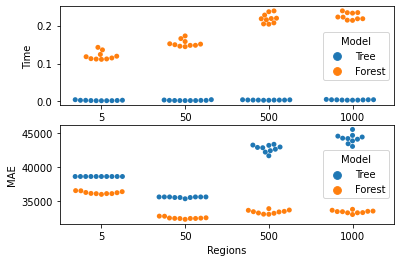

In [74]:
fig, axs = plt.subplots(2,1)
sns.swarmplot(data=df, x='Regions', y='Time', hue='Model',ax=axs[0])
sns.swarmplot(data=df, x='Regions', y='MAE', hue='Model',ax=axs[1])

Our first parameter search and model comparison plot. Random Forest is significantly more accurate than a single Tree, and the training cost is small. The validation plot shows a more complex Random Forest model could reduce more error, whereas the Single Tree maxes out at 500 regions. Training larger Forests jitters the training time. Complex Single Decision trees increases validation error variability. Random Forest error is very stable. Hence Random Forests using an ensemble of Trees could create a space to optimize within.

What kind of data would cause variability in the Random Forest output?

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [105]:
features = ["SalePrice", "PoolArea", "ScreenPorch", "GarageArea", "GarageCars", "Fireplaces", "TotRmsAbvGrd", "FullBath", "1stFlrSF", "YearRemodAdd", "YearBuilt", "OverallCond"]
mask = data["OverallQual"] > 9
nice_homes = data[mask][features]
other_homes = data[~mask][features]

In [90]:
from scipy.stats import f_oneway

In [109]:
f_val, p_val = f_oneway(other_homes, nice_homes)
p_val < 0.05

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [113]:
nice_homes["YearBuilt"].describe()

count      18.000000
mean     1991.888889
std        36.467373
min      1892.000000
25%      1997.250000
50%      2006.000000
75%      2007.750000
max      2009.000000
Name: YearBuilt, dtype: float64

In [114]:
other_homes.YearBuilt.describe()

count    1442.000000
mean     1971.010402
std        30.042358
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [116]:
data[data.YearBuilt < 1900].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15.0,823.800000,413.023209,107.0,607.5,810.0,1135.5,1417.0
MSSubClass,15.0,74.000000,34.496377,30.0,70.0,70.0,75.0,190.0
LotFrontage,15.0,74.000000,20.942097,50.0,60.0,65.0,90.0,121.0
LotArea,15.0,11410.600000,4919.032393,5250.0,8460.0,10800.0,12600.0,22950.0
OverallQual,15.0,6.400000,1.956674,4.0,5.0,6.0,7.5,10.0
OverallCond,15.0,6.800000,1.820518,4.0,5.5,7.0,8.5,9.0
YearBuilt,15.0,1884.933333,7.362712,1872.0,1880.0,1885.0,1891.0,1898.0
YearRemodAdd,15.0,1985.133333,18.329783,1950.0,1975.5,1993.0,1997.0,2003.0
MasVnrArea,15.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BsmtFinSF1,15.0,104.200000,284.682329,0.0,0.0,0.0,0.0,1088.0
